### LSE Data Analytics Online Career Accelerator 

# DA301:  Advanced Analytics for Organisational Impact

## Assignment template

### Scenario
You are a data analyst working for Turtle Games, a game manufacturer and retailer. They manufacture and sell their own products, along with sourcing and selling products manufactured by other companies. Their product range includes books, board games, video games and toys. They have a global customer base and have a business objective of improving overall sales performance by utilising customer trends. In particular, Turtle Games wants to understand: 
- how customers accumulate loyalty points (Week 1)
- how useful are remuneration and spending scores data (Week 2)
- can social data (e.g. customer reviews) be used in marketing campaigns (Week 3)
- what is the impact on sales per product (Week 4)
- the reliability of the data (e.g. normal distribution, Skewness, Kurtosis) (Week 5)
- if there is any possible relationship(s) in sales between North America, Europe, and global sales (Week 6).

# Week 1 assignment: Linear regression using Python
The marketing department of Turtle Games prefers Python for data analysis. As you are fluent in Python, they asked you to assist with data analysis of social media data. The marketing department wants to better understand how users accumulate loyalty points. Therefore, you need to investigate the possible relationships between the loyalty points, age, remuneration, and spending scores. Note that you will use this data set in future modules as well and it is, therefore, strongly encouraged to first clean the data as per provided guidelines and then save a copy of the clean data for future use.

## Instructions
1. Load and explore the data.
    1. Create a new DataFrame (e.g. reviews).
    2. Sense-check the DataFrame.
    3. Determine if there are any missing values in the DataFrame.
    4. Create a summary of the descriptive statistics.
2. Remove redundant columns (`language` and `platform`).
3. Change column headings to names that are easier to reference (e.g. `renumeration` and `spending_score`).
4. Save a copy of the clean DataFrame as a CSV file. Import the file to sense-check.
5. Use linear regression and the `statsmodels` functions to evaluate possible linear relationships between loyalty points and age/renumeration/spending scores to determine whether these can be used to predict the loyalty points.
    1. Specify the independent and dependent variables.
    2. Create the OLS model.
    3. Extract the estimated parameters, standard errors, and predicted values.
    4. Generate the regression table based on the X coefficient and constant values.
    5. Plot the linear regression and add a regression line.
6. Include your insights and observations.

## 1. Load and explore the data

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
from statsmodels.formula.api import ols

In [2]:
# Load the CSV file(s) as reviews.
reviews = pd.read_csv('turtle_reviews.csv')

# View the start of DataFrame.
reviews.head()

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary
0,Male,18,12.30,39,210,graduate,EN,Web,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,EN,Web,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,EN,Web,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,EN,Web,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,EN,Web,291,As my review of GF9's previous screens these w...,Money trap


In [3]:
# View the end of DataFrame.
reviews.tail()

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary
1995,Female,37,84.46,69,4031,PhD,EN,Web,977,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,Female,43,92.66,8,539,PhD,EN,Web,979,Great game. Did not think I would like it whe...,Super fun
1997,Male,34,92.66,91,5614,graduate,EN,Web,1012,Great game for all.........\nKeeps the mind ni...,Great Game
1998,Male,34,98.40,16,1048,PhD,EN,Web,1031,fun game!,Four Stars
1999,Male,32,92.66,8,479,PhD,EN,Web,453,This game is fun. A lot like scrabble without ...,Love this game


In [4]:
# Any missing values?
rnull = reviews.isnull().sum()
rna = reviews.isna().sum()

print('Null Check: \n')
print(rnull,'\n')
print('NA Check: \n')
print(rna)

Null Check: 

gender                    0
age                       0
remuneration (k£)         0
spending_score (1-100)    0
loyalty_points            0
education                 0
language                  0
platform                  0
product                   0
review                    0
summary                   0
dtype: int64 

NA Check: 

gender                    0
age                       0
remuneration (k£)         0
spending_score (1-100)    0
loyalty_points            0
education                 0
language                  0
platform                  0
product                   0
review                    0
summary                   0
dtype: int64


In [5]:
# Explore the data.
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform                2000 non-null   object 
 8   product                 2000 non-null   int64  
 9   review                  2000 non-null   object 
 10  summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB


In [6]:
# Explore the data.
print('columns,rows:\n',reviews.shape)

columns,rows:
 (2000, 11)


In [7]:
# Descriptive statistics.
reviews.describe()

,age,remuneration (k£),spending_score (1-100),loyalty_points,product
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,39.495000,48.079060,50.000000,1578.032000,4320.521500
std,13.573212,23.123984,26.094702,1283.239705,3148.938839
min,17.000000,12.300000,1.000000,25.000000,107.000000
25%,29.000000,30.340000,32.000000,772.000000,1589.250000
50%,38.000000,47.150000,50.000000,1276.000000,3624.000000
75%,49.000000,63.960000,73.000000,1751.250000,6654.000000
max,72.000000,112.340000,99.000000,6847.000000,11086.000000


## 2. Drop columns

In [8]:
# Drop unnecessary columns.
reviews_2 = reviews.drop(['language', 'platform'], axis=1)

# View column names.
reviews_2.head(0)

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,product,review,summary


## 3. Rename columns

In [9]:
# Rename the column headers.
reviews_2 = reviews_2.rename(columns={'remuneration (k£)':'remuneration', 
                             'spending_score (1-100)':'spending_score'})

# View column names.
reviews_2.head(0)

,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary


## 4. Save the DataFrame as a CSV file

In [10]:
# Create a CSV file as output.
reviews_2.to_csv('turtle_reviews_clean.csv', index=False)

In [11]:
# Import new CSV file with Pandas.
reviews_clean = pd.read_csv('turtle_reviews_clean.csv')

# View DataFrame.
reviews_clean.head()

,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


## 5. Linear regression

### 5a) spending vs loyalty

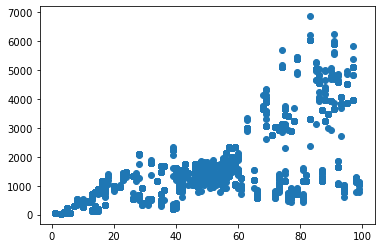

In [12]:
# Independent variable.
x = reviews_clean['spending_score']

# Dependent variable.
y = reviews_clean['loyalty_points']

# Check for linearity.
plt.scatter(x, y)

In [13]:
# OLS model.
f = 'y ~ x'
test = ols(f, data = reviews_clean).fit()

test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1648.
Date:                Sun, 15 Jan 2023   Prob (F-statistic):          2.92e-263
Time:                        08:59:36   Log-Likelihood:                -16550.
No. Observations:                2000   AIC:                         3.310e+04
Df Residuals:                    1998   BIC:                         3.312e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -75.0527     45.931     -1.634      0.102    -165.129      15.024
x             33.0617      0.814     40.595      0.000      31.464      34.659
==============================================================================
Omnibus:                      126.554   Durbin-Watson:                   1.191
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              260.528
Skew:                           0.422   Prob(JB):                     2.67e-57
Kurtosis:                       4.554   Cond. No.                         122.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
# Extract the estimated parameters.
print("Parameters:\n", test.params,'\n')

# Extract the standard errors.
print("Standard errors:\n", test.bse,'\n')

# Extract the predicted values.
print("Predicted values:\n", test.predict())

Parameters:
 Intercept   -75.052663
x            33.061693
dtype: float64 

Standard errors:
 Intercept    45.930554
x             0.814419
dtype: float64 

Predicted values:
 [1214.35337415 2602.94449102  123.31749662 ... 2933.56142361  453.93442921
  189.44088314]


In [15]:
# Set the X coefficient and the constant to generate the regression table.
y_pred = (-75.052663) + 33.061693 * reviews_clean['spending_score']

# View the output.
y_pred

0       1214.353364
1       2602.944470
2        123.317495
3       2470.697698
4       1247.415057
           ...     
1995    2206.204154
1996     189.440881
1997    2933.561400
1998     453.934425
1999     189.440881
Name: spending_score, Length: 2000, dtype: float64

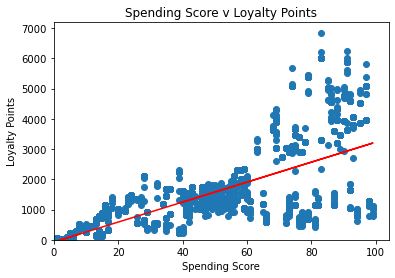

In [16]:
# Plot the graph with a regression line.
plt.scatter(x, y)

plt.plot(x, y_pred, color='red')

# Set axis limit to 0 and label axis
plt.xlim(0)
plt.ylim(0)

plt.xlabel('Spending Score')
plt.ylabel('Loyalty Points')
plt.title('Spending Score v Loyalty Points')

plt.show()

### 5b) renumeration vs loyalty

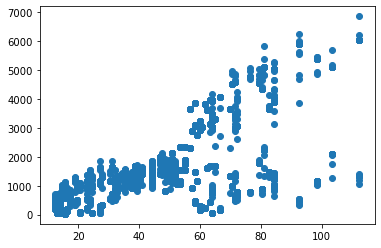

In [17]:
# Independent variable.
x = reviews_clean['remuneration']

# Dependent variable.
y = reviews_clean['loyalty_points']

# Check for linearity.
plt.scatter(x, y)

In [18]:
# OLS model.
f = 'y ~ x'
test_2 = ols(f, data = reviews_clean).fit()

test_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     1222.
Date:                Sun, 15 Jan 2023   Prob (F-statistic):          2.43e-209
Time:                        08:59:37   Log-Likelihood:                -16674.
No. Observations:                2000   AIC:                         3.335e+04
Df Residuals:                    1998   BIC:                         3.336e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -65.6865     52.171     -1.259      0.208    -168.001      36.628
x             34.1878      0.978     34.960      0.000      32.270      36.106
==============================================================================
Omnibus:                       21.285   Durbin-Watson:                   3.622
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.715
Skew:                           0.089   Prob(JB):                     1.30e-07
Kurtosis:                       3.590   Cond. No.                         123.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
# Extract the estimated parameters.
print("Parameters:\n", test_2.params,'\n')

# Extract the standard errors.
print("Standard errors:\n", test_2.bse,'\n')

# Extract the predicted values.
print("Predicted values:\n", test_2.predict())

Parameters:
 Intercept   -65.686513
x            34.187825
dtype: float64 

Standard errors:
 Intercept    52.170717
x             0.977925
dtype: float64 

Predicted values:
 [ 354.82374068  354.82374068  382.85775758 ... 3102.15739671 3298.39551499
 3102.15739671]


In [20]:
# Set the X coefficient and the constant to generate the regression table.
y_pred_2 = (-65.686513) + 34.187825 * reviews_clean['remuneration']

# View the output.
y_pred_2

0        354.823735
1        354.823735
2        382.857751
3        382.857751
4        410.891767
           ...     
1995    2821.817186
1996    3102.157351
1997    3102.157351
1998    3298.395467
1999    3102.157351
Name: remuneration, Length: 2000, dtype: float64

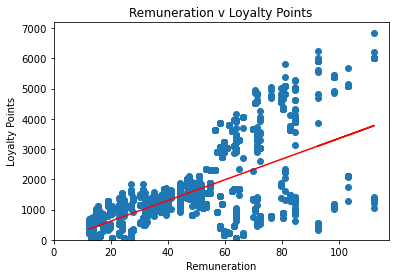

In [21]:
# Plot the graph with a regression line.
plt.scatter(x, y)

plt.plot(x, y_pred_2, color='red')

# Set axis limit to 0 and label axis
plt.xlim(0)
plt.ylim(0)

plt.xlabel('Remuneration')
plt.ylabel('Loyalty Points')
plt.title('Remuneration v Loyalty Points')

plt.show()

### 5c) age vs loyalty

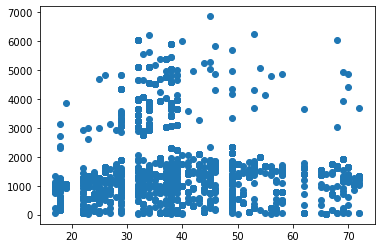

In [22]:
# Independent variable.
x = reviews_clean['age']

# Dependent variable.
y = reviews_clean['loyalty_points']

# Check for linearity.
plt.scatter(x, y)

In [23]:
# OLS model.
f = 'y ~ x'
test_3 = ols(f, data = reviews_clean).fit()

test_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.606
Date:                Sun, 15 Jan 2023   Prob (F-statistic):             0.0577
Time:                        08:59:38   Log-Likelihood:                -17150.
No. Observations:                2000   AIC:                         3.430e+04
Df Residuals:                    1998   BIC:                         3.431e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1736.5177     88.249     19.678      0.000    1563.449    1909.587
x             -4.0128      2.113     -1.899      0.058      -8.157       0.131
==============================================================================
Omnibus:                      481.477   Durbin-Watson:                   2.277
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              937.734
Skew:                           1.449   Prob(JB):                    2.36e-204
Kurtosis:                       4.688   Cond. No.                         129.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
# Extract the estimated parameters.
print("Parameters:\n", test_3.params,'\n')

# Extract the standard errors.
print("Standard errors:\n", test_3.bse,'\n')

# Extract the predicted values.
print("Predicted values:\n", test_3.predict())

Parameters:
 Intercept    1736.517739
x              -4.012805
dtype: float64 

Standard errors:
 Intercept    88.248731
x             2.113177
dtype: float64 

Predicted values:
 [1664.2872467  1644.22322095 1648.2360261  ... 1600.0823643  1600.0823643
 1608.1079746 ]


In [25]:
# Set the X coefficient and the constant to generate the regression table.
y_pred_3 = (1736.517739) + -4.012805 * reviews_clean['age']

# View the output.
y_pred_3

0       1664.287249
1       1644.223224
2       1648.236029
3       1636.197614
4       1604.095174
           ...     
1995    1588.043954
1996    1563.967124
1997    1600.082369
1998    1600.082369
1999    1608.107979
Name: age, Length: 2000, dtype: float64

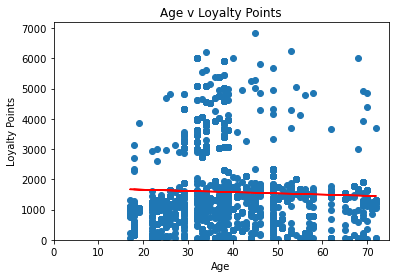

In [26]:
# Plot the graph with a regression line.
plt.scatter(x, y)

plt.plot(x, y_pred_3, color='red')

# Set axis limit to 0 and label axis
plt.xlim(0)
plt.ylim(0)

plt.xlabel('Age')
plt.ylabel('Loyalty Points')
plt.title('Age v Loyalty Points')

plt.show()

## 6. Observations and insights

***Your observations here...***






The R squared measure between spending vs loyalty is the highest at 0.45, the R squared indicates the proportion of total variation in the dependent variable which can be explained or allocated by total variation in the independent variable. The closer the R squared value is to 1 the better the fit.

There is a positive correlation between spending v loyalty and renumeration v loyalty although the the R squared values signify a correlation the strength of the fit and correlation is not very high and more than 50% of the variations in the dependent variables are inexplicable.

There is no fit for age vs loyalty and the relationship is not present, the R Squared value is negligible at almost 0.

A test for homoscedasticity would have been a good prerequisite prior to the linear regression.

The P value (F Stat) for spending v loyalty and renumeration v loyalty are very low at less than 0 indicating the probability of observed difference happening by chance is low it is also less than alpha 0.05 indicating P is significant and the relation between variables are present.

# 

# Week 2 assignment: Clustering with *k*-means using Python

The marketing department also wants to better understand the usefulness of renumeration and spending scores but do not know where to begin. You are tasked to identify groups within the customer base that can be used to target specific market segments. Use *k*-means clustering to identify the optimal number of clusters and then apply and plot the data using the created segments.

## Instructions
1. Prepare the data for clustering. 
    1. Import the CSV file you have prepared in Week 1.
    2. Create a new DataFrame (e.g. `df2`) containing the `renumeration` and `spending_score` columns.
    3. Explore the new DataFrame. 
2. Plot the renumeration versus spending score.
    1. Create a scatterplot.
    2. Create a pairplot.
3. Use the Silhouette and Elbow methods to determine the optimal number of clusters for *k*-means clustering.
    1. Plot both methods and explain how you determine the number of clusters to use.
    2. Add titles and legends to the plot.
4. Evaluate the usefulness of at least three values for *k* based on insights from the Elbow and Silhoutte methods.
    1. Plot the predicted *k*-means.
    2. Explain which value might give you the best clustering.
5. Fit a final model using your selected value for *k*.
    1. Justify your selection and comment on the respective cluster sizes of your final solution.
    2. Check the number of observations per predicted class.
6. Plot the clusters and interpret the model.

## 1. Load and explore the data

In [27]:
# Import necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings('ignore')

In [28]:
# Load the CSV file(s) as df2.
df = pd.read_csv('turtle_reviews_clean.csv')

# View DataFrame.
df

,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap
...,...,...,...,...,...,...,...,...,...
1995,Female,37,84.46,69,4031,PhD,977,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,Female,43,92.66,8,539,PhD,979,Great game. Did not think I would like it whe...,Super fun
1997,Male,34,92.66,91,5614,graduate,1012,Great game for all.........\nKeeps the mind ni...,Great Game
1998,Male,34,98.40,16,1048,PhD,1031,fun game!,Four Stars


In [29]:
# Drop unnecessary columns.
df2 = df.drop(columns=['gender', 'age', 'loyalty_points', 'education', 'product', 'review', 'summary'])

# View DataFrame.
df2

,remuneration,spending_score
0,12.30,39
1,12.30,81
2,13.12,6
3,13.12,77
4,13.94,40
...,...,...
1995,84.46,69
1996,92.66,8
1997,92.66,91
1998,98.40,16


## 2. Plot

<AxesSubplot:xlabel='remuneration', ylabel='spending_score'>

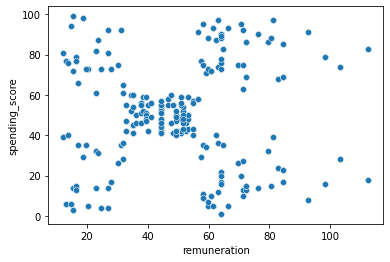

In [30]:
# Create a scatterplot with Seaborn.
sns.scatterplot(x='remuneration', y='spending_score',
                data=df2)

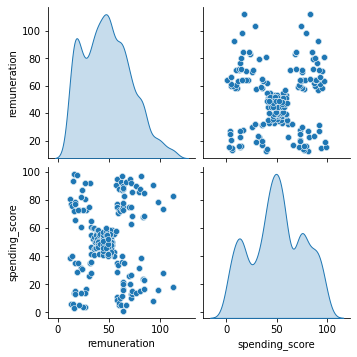

In [31]:
# Create a pairplot with Seaborn.
x = df2[['remuneration', 'spending_score']]

sns.pairplot(df2, 
             vars=x, 
             diag_kind='kde')

## 3. Elbow and silhoutte methods

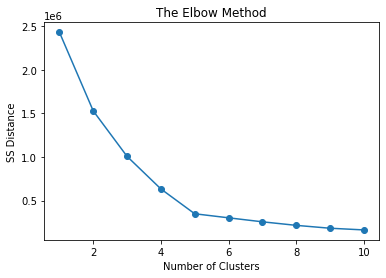

In [32]:
# Determine the number of clusters: Elbow method.
ss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i,
                    init = 'k-means++', 
                    max_iter = 500,
                    n_init = 10,
                    random_state = 0)
    kmeans.fit(x)
    ss.append(kmeans.inertia_)
    
# Plot the elbow method.
plt.plot(range(1, 11),
         ss,
         marker='o')

plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("SS Distance")

plt.show()

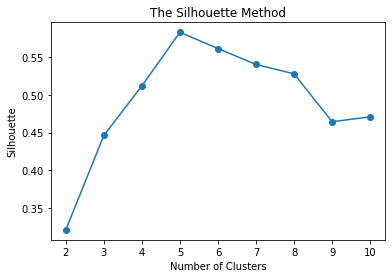

In [33]:
# Determine the number of clusters: Silhouette method.
sil = []
kmax = 10

for k in range(2, kmax+1):
    kmeans_s = KMeans(n_clusters = k).fit(x)
    labels = kmeans_s.labels_
    sil.append(silhouette_score(x,
                                labels,
                                metric = 'euclidean'))

# Plot the silhouette method.
plt.plot(range(2, kmax+1),
         sil,
         marker='o')

plt.title("The Silhouette Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette")

plt.show()

## 4. Evaluate k-means model at different values of *k*

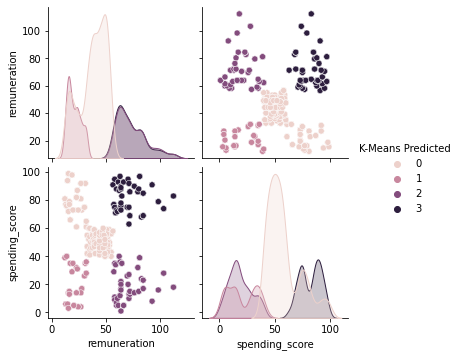

In [34]:
# Use four clusters:
kmeans = KMeans(n_clusters = 4,
                max_iter = 15000,
                init='k-means++',
                random_state=0).fit(x)

clusters = kmeans.labels_
x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')

In [35]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

0    1013
3     356
2     351
1     280
Name: K-Means Predicted, dtype: int64

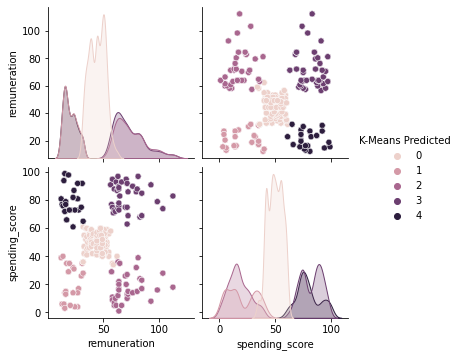

In [36]:
# Use five clusters:
kmeans = KMeans(n_clusters = 5,
                max_iter = 15000,
                init='k-means++',
                random_state=0).fit(x)

clusters = kmeans.labels_
x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')

In [37]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

0    774
3    356
2    330
1    271
4    269
Name: K-Means Predicted, dtype: int64

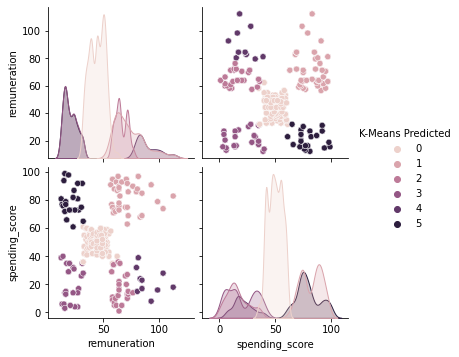

In [38]:
# Use six clusters:
kmeans = KMeans(n_clusters = 6,
                max_iter = 15000,
                init='k-means++',
                random_state=0).fit(x)

clusters = kmeans.labels_
x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')

In [39]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

0    767
1    356
3    271
5    269
2    214
4    123
Name: K-Means Predicted, dtype: int64

## 5. Fit final model and justify your choice

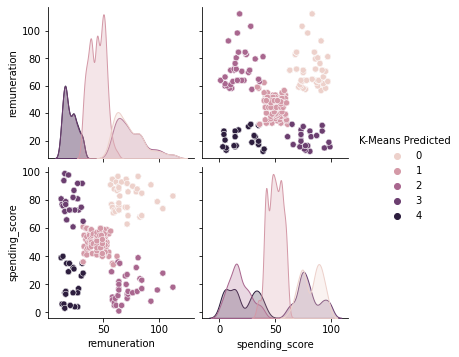

In [40]:
# Apply the final model.
# Use five clusters:
kmeans = KMeans(n_clusters = 5,
                max_iter = 15000,
                init='k-means++',
                random_state=0).fit(x)

clusters = kmeans.labels_
x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')

In [41]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

1    774
0    356
2    330
4    271
3    269
Name: K-Means Predicted, dtype: int64

## 6. Plot and interpret the clusters

In [42]:
# View the DataFrame.
x.head()

,remuneration,spending_score,K-Means Predicted
0,12.30,39,4
1,12.30,81,3
2,13.12,6,4
3,13.12,77,3
4,13.94,40,4


<AxesSubplot:xlabel='remuneration', ylabel='spending_score'>

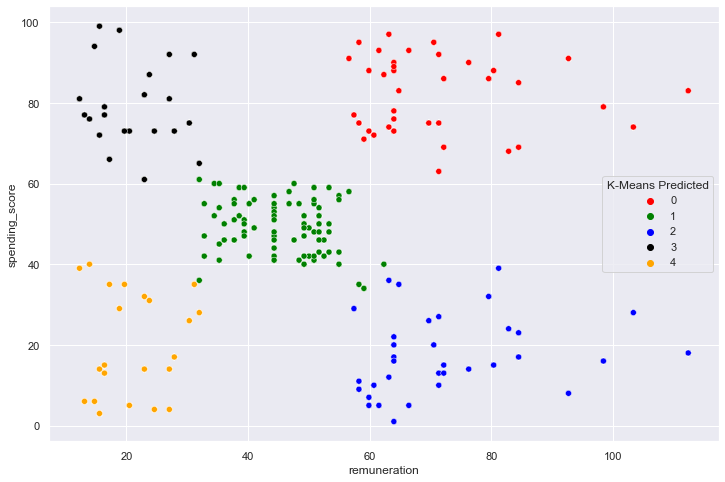

In [43]:
# Set plot size.
sns.set(rc = {'figure.figsize':(12, 8)})

# Visualising the clusters.
sns.scatterplot(x='remuneration' , 
                y ='spending_score',
                data=x ,
                hue='K-Means Predicted',
                palette=['red', 'green', 'blue', 'black', 'orange'])

## 7. Discuss: Insights and observations

***Your observations here...***

Upon analysis of pairplots, elbow and silouette models it was evident that 5 clusters was the optimum as it illustrated each of the distinct clusters.

The elbow method shows a plateau after the 5th cluster and similarly the silhouette method shows a peak at the highest value on the 5th cluster.

Further confirmation by testing 4, 5 and 6 clusters can confirm the final model fits with 5 distinguishable clusters. 

Finally we must take into account there are some outliers as shown in the blue and red clusters in the illustration above, these must be considered ad outliers and not clusters as there is not enough grouping present to define them as a new cluster.

# 

# Week 3 assignment: NLP using Python
Customer reviews were downloaded from the website of Turtle Games. This data will be used to steer the marketing department on how to approach future campaigns. Therefore, the marketing department asked you to identify the 15 most common words used in online product reviews. They also want to have a list of the top 20 positive and negative reviews received from the website. Therefore, you need to apply NLP on the data set.

## Instructions
1. Load and explore the data. 
    1. Sense-check the DataFrame.
    2. You only need to retain the `review` and `summary` columns.
    3. Determine if there are any missing values.
2. Prepare the data for NLP
    1. Change to lower case and join the elements in each of the columns respectively (`review` and `summary`).
    2. Replace punctuation in each of the columns respectively (`review` and `summary`).
    3. Drop duplicates in both columns (`review` and `summary`).
3. Tokenise and create wordclouds for the respective columns (separately).
    1. Create a copy of the DataFrame.
    2. Apply tokenisation on both columns.
    3. Create and plot a wordcloud image.
4. Frequency distribution and polarity.
    1. Create frequency distribution.
    2. Remove alphanumeric characters and stopwords.
    3. Create wordcloud without stopwords.
    4. Identify 15 most common words and polarity.
5. Review polarity and sentiment.
    1. Plot histograms of polarity (use 15 bins) for both columns.
    2. Review the sentiment scores for the respective columns.
6. Identify and print the top 20 positive and negative reviews and summaries respectively.
7. Include your insights and observations.

## 1. Load and explore the data

In [44]:
# Import all the necessary packages.
import pandas as pd
import numpy as np
import nltk 
import os 
import matplotlib.pyplot as plt

# nltk.download ('punkt').
# nltk.download ('stopwords').

from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from textblob import TextBlob
from scipy.stats import norm

# Import Counter.
from collections import Counter

import gc
import warnings
warnings.filterwarnings('ignore')

In [45]:
# Load the data set as df3.
df3 = pd.read_csv('turtle_reviews_clean.csv')

# View DataFrame.
df3

,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap
...,...,...,...,...,...,...,...,...,...
1995,Female,37,84.46,69,4031,PhD,977,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,Female,43,92.66,8,539,PhD,979,Great game. Did not think I would like it whe...,Super fun
1997,Male,34,92.66,91,5614,graduate,1012,Great game for all.........\nKeeps the mind ni...,Great Game
1998,Male,34,98.40,16,1048,PhD,1031,fun game!,Four Stars


In [46]:
# Explore data set.
print('columns,rows:\n',df3.shape)

columns,rows:
 (2000, 9)


In [47]:
# Explore data set.
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          2000 non-null   object 
 1   age             2000 non-null   int64  
 2   remuneration    2000 non-null   float64
 3   spending_score  2000 non-null   int64  
 4   loyalty_points  2000 non-null   int64  
 5   education       2000 non-null   object 
 6   product         2000 non-null   int64  
 7   review          2000 non-null   object 
 8   summary         2000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 140.8+ KB


In [48]:
# Explore data set.
df3.describe()

,age,remuneration,spending_score,loyalty_points,product
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,39.495000,48.079060,50.000000,1578.032000,4320.521500
std,13.573212,23.123984,26.094702,1283.239705,3148.938839
min,17.000000,12.300000,1.000000,25.000000,107.000000
25%,29.000000,30.340000,32.000000,772.000000,1589.250000
50%,38.000000,47.150000,50.000000,1276.000000,3624.000000
75%,49.000000,63.960000,73.000000,1751.250000,6654.000000
max,72.000000,112.340000,99.000000,6847.000000,11086.000000


In [49]:
# Keep necessary columns. Drop unnecessary columns.
df3 = df3.drop(columns=['gender', 'age', 'remuneration', 'spending_score', 
                        'loyalty_points', 'education', 'product'])

# View DataFrame.
df3.head()

,review,summary
0,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,As my review of GF9's previous screens these w...,Money trap


In [50]:
# Determine if there are any missing values.
df3null = df3.isnull().sum()
df3na = df3.isna().sum()

print('Null Check: \n')
print(df3null,'\n')
print('NA Check: \n')
print(df3na)

Null Check: 

review     0
summary    0
dtype: int64 

NA Check: 

review     0
summary    0
dtype: int64


## 2. Prepare the data for NLP
### 2a) Change to lower case and join the elements in each of the columns respectively (review and summary)

In [51]:
# Review: Change all to lower case and join with a space.
df3['review'] = df3['review'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [52]:
# Summary: Change all to lower case and join with a space.
df3['summary'] = df3['summary'].apply(lambda x: " ".join(x.lower() for x in x.split()))

### 2b) Replace punctuation in each of the columns respectively (review and summary)

In [53]:
# Replace all the punctuations in review column.
df3['review'] = df3['review'].str.replace('[^\w\s]','')

# View output.
df3['review'].head()

0    when it comes to a dms screen the space on the...
1    an open letter to galeforce9 your unpainted mi...
2    nice art nice printing why two panels are fill...
3    amazing buy bought it as a gift for our new dm...
4    as my review of gf9s previous screens these we...
Name: review, dtype: object

In [54]:
# Replace all the punctuations in review column.
df3['summary'] = df3['summary'].str.replace('[^\w\s]','')

# View output.
df3['summary'].head()

0    the fact that 50 of this space is wasted on ar...
1    another worthless dungeon masters screen from ...
2                       pretty but also pretty useless
3                                           five stars
4                                           money trap
Name: summary, dtype: object

### 2c) Drop duplicates in both columns

In [58]:
# Check for duplicates in review column
rev_dup = df3.review.duplicated().sum()

print('Number of duplicates in review column:\n')
print(rev_dup)

Number of duplicates in review column:

50


In [59]:
# Check for duplicates in summary column
sum_dup = df3.summary.duplicated().sum()

print('Number of duplicates in summary column:\n')
print(sum_dup)

Number of duplicates in summary column:

649


In [60]:
# Drop duplicates in review column.
df3 = df3.drop_duplicates(subset=['review'])

In [61]:
# Drop duplicates in summary column.
df3 = df3.drop_duplicates(subset=['summary'])

In [62]:
# View DataFrame.
df3.reset_index(drop = True, inplace = True)
df3.head()

,review,summary
0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...
2,nice art nice printing why two panels are fill...,pretty but also pretty useless
3,amazing buy bought it as a gift for our new dm...,five stars
4,as my review of gf9s previous screens these we...,money trap


In [64]:
# Reset the index and check for duplicates.
df3.reset_index(inplace=True)
df3.duplicated().sum()

0

In [65]:
# Recheck for duplicates.
print('Number of duplicates in review column:\n',df3.review.duplicated().sum())
print('Number of duplicates in summary column:\n',df3.summary.duplicated().sum())

Number of duplicates in review column:
 0
Number of duplicates in summary column:
 0


## 3. Tokenise and create wordclouds

In [66]:
# Create new DataFrame (copy DataFrame).
df4 = df3.copy(deep=True)

# View DataFrame.
df4.head()

,level_0,index,review,summary
0,0,0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,1,1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...
2,2,2,nice art nice printing why two panels are fill...,pretty but also pretty useless
3,3,3,amazing buy bought it as a gift for our new dm...,five stars
4,4,4,as my review of gf9s previous screens these we...,money trap


In [67]:
# Review: Create a word cloud.
# String all the comments together in a single variable.
# Create an empty string variable.
all_review = ''
for i in range(df4.shape[0]):
    # Add each comment.
    all_review = all_review + df4['review'][i]

In [68]:
# Set the colour palette.
sns.set(color_codes=True)

# Create a WordCloud object.
word_cloud = WordCloud(width = 1600, height = 900, 
                background_color ='white',
                colormap = 'plasma', 
                stopwords = 'none',
                min_font_size = 10).generate(all_review) 

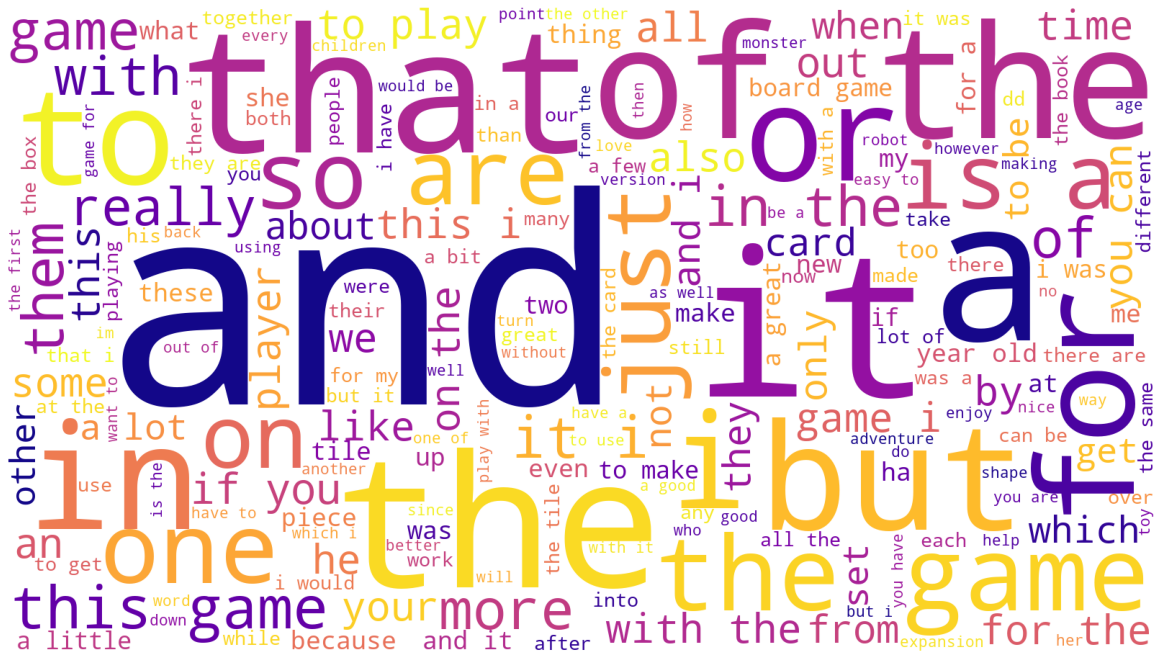

In [69]:
# Review: Plot the WordCloud image.                   
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(word_cloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

In [70]:
# Summary: Create a word cloud.
# String all the comments together in a single variable.
# Create an empty string variable.
all_summary = ''
for i in range(df4.shape[0]):
    # Add each comment.
    all_summary = all_summary + df4['summary'][i]

In [71]:
# Set the colour palette.
sns.set(color_codes=True)

# Create a WordCloud object.
word_cloud = WordCloud(width = 1600, height = 900, 
                background_color ='white',
                colormap = 'plasma', 
                stopwords = 'none',
                min_font_size = 10).generate(all_summary) 

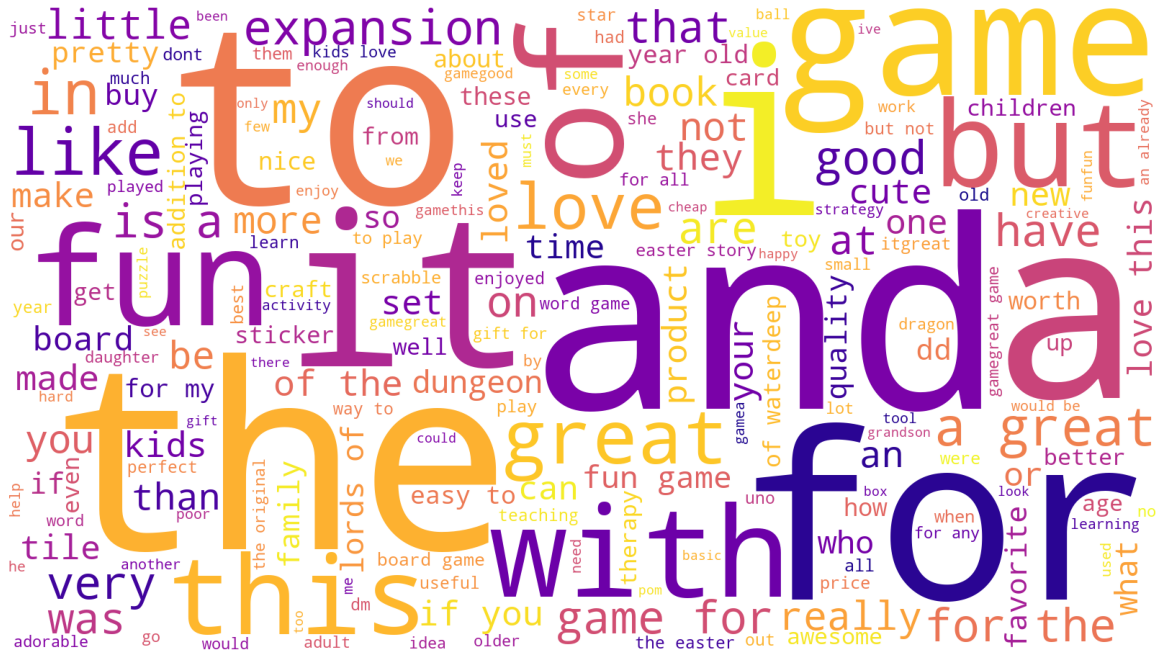

In [72]:
# Summary: Plot the WordCloud image.
# Review: Plot the WordCloud image.                   
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(word_cloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

## 4. Frequency distribution and polarity
### 4a) Create frequency distribution

In [73]:
# Tokenise the words in both columns.
df4['review'] = df4['review'].apply(word_tokenize)

df4['summary'] = df4['summary'].apply(word_tokenize)

df4.head()

,level_0,index,review,summary
0,0,0,"[when, it, comes, to, a, dms, screen, the, spa...","[the, fact, that, 50, of, this, space, is, was..."
1,1,1,"[an, open, letter, to, galeforce9, your, unpai...","[another, worthless, dungeon, masters, screen,..."
2,2,2,"[nice, art, nice, printing, why, two, panels, ...","[pretty, but, also, pretty, useless]"
3,3,3,"[amazing, buy, bought, it, as, a, gift, for, o...","[five, stars]"
4,4,4,"[as, my, review, of, gf9s, previous, screens, ...","[money, trap]"


In [74]:
# Define an empty list of review tokens.
review_tokens = []

for i in range(df4.shape[0]):
    # Add each token to the list.
    review_tokens = review_tokens + df4['review'][i]

In [75]:
# Calculate the frequency distribution.
fdist_review_tokens = FreqDist(review_tokens)

# Preview data.
fdist_review_tokens

FreqDist({'the': 5019, 'and': 2934, 'to': 2843, 'a': 2829, 'of': 2261, 'i': 1887, 'it': 1830, 'is': 1593, 'this': 1549, 'for': 1360, ...})

In [76]:
# Define an empty list of summary tokens.
summary_tokens = []

for i in range(df4.shape[0]):
    # Add each token to the list.
    summary_tokens = summary_tokens + df4['summary'][i]

In [77]:
# Calculate the frequency distribution.
fdist_summary_tokens = FreqDist(summary_tokens)

# Preview data.
fdist_summary_tokens

FreqDist({'game': 268, 'the': 257, 'a': 238, 'great': 236, 'for': 229, 'to': 192, 'fun': 175, 'and': 168, 'it': 139, 'of': 131, ...})

### 4b) Remove alphanumeric characters and stopwords

In [78]:
# Delete all the alphanum.
review_tokens1 = [word for word in review_tokens if word.isalnum()]
summary_tokens1 = [word for word in summary_tokens if word.isalnum()]

In [79]:
# Create a set of English stop words.
english_stopwords = set(stopwords.words('english'))

In [80]:
# Remove all the stopwords
# Create a filtered list of tokens without stop words.
review_tokens1 = [x for x in review_tokens1 if x.lower() not in english_stopwords]

# Define an empty string variable.
review_tokens_string = ''

for value in review_tokens1:
    # Add each filtered token word to the string.
    review_tokens_string = review_tokens_string + value + ' '


In [81]:
# Remove all the stopwords
# Create a filtered list of tokens without stop words.
summary_tokens1 = [x for x in summary_tokens1 if x.lower() not in english_stopwords]

# Define an empty string variable.
summary_tokens_string = ''

for value in summary_tokens1:
    # Add each filtered token word to the string.
    summary_tokens_string = summary_tokens_string + value + ' '

### 4c) Create wordcloud without stopwords

In [82]:
# Create a wordcloud without stop words for the review column without stopwords.
word_cloud = WordCloud(width = 1600, height = 900, 
                background_color ='white',
                colormap = 'plasma', 
                stopwords = 'none',
                min_font_size = 10).generate(review_tokens_string) 

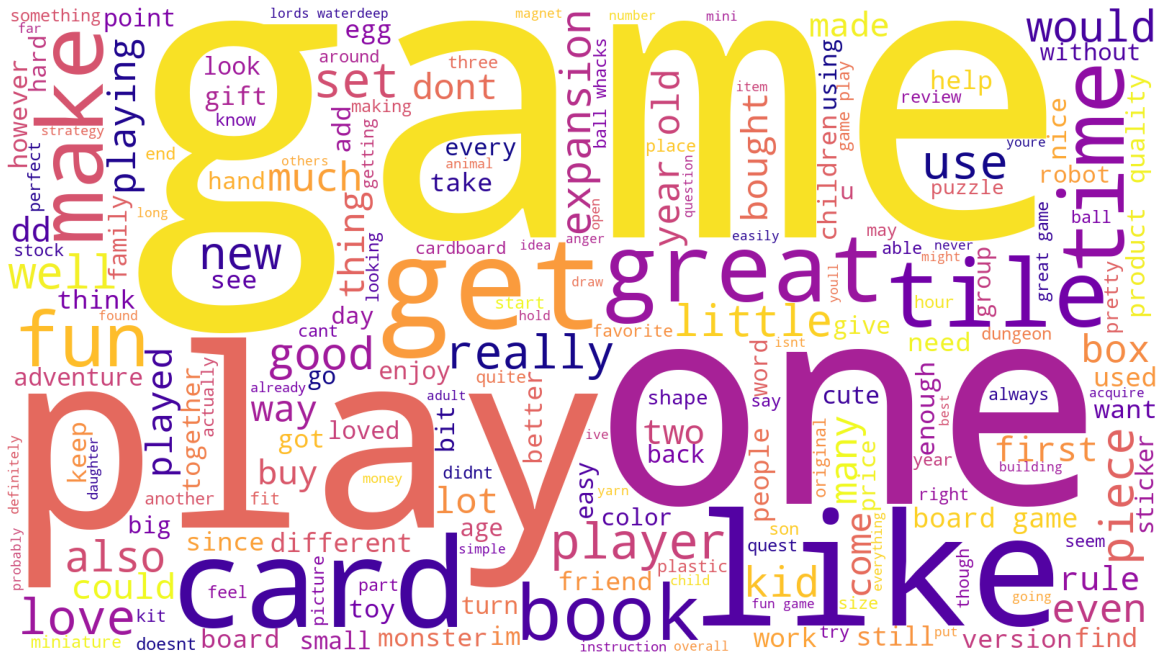

In [83]:
# Plot the wordcloud image.
# Summary: Plot the WordCloud image.
# Review: Plot the WordCloud image.                   
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(word_cloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

In [84]:
# Create a wordcloud without stop words for the review column without stopwords.
word_cloud = WordCloud(width = 1600, height = 900, 
                background_color ='white',
                colormap = 'plasma', 
                stopwords = 'none',
                min_font_size = 10).generate(summary_tokens_string) 

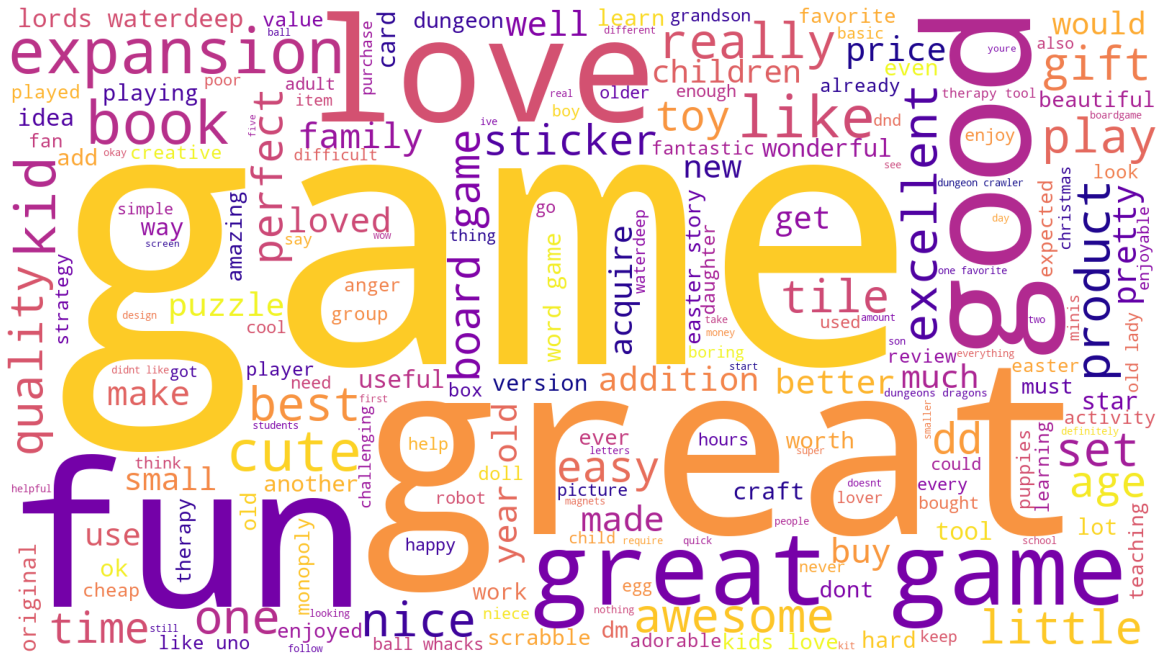

In [85]:
# Plot the wordcloud image.
# Summary: Plot the WordCloud image.
# Review: Plot the WordCloud image.                   
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(word_cloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

### 4d) Identify 15 most common words and polarity

In [86]:
# Determine the 15 most common words in review column.
fdist1_review = FreqDist(review_tokens1)

# Preview the data.
fdist1_review

FreqDist({'game': 1359, 'one': 475, 'play': 442, 'fun': 407, 'great': 391, 'like': 373, 'get': 293, 'cards': 281, 'tiles': 280, 'really': 278, ...})

In [87]:
# Generate a DataFrame from Counter.
counts_review = pd.DataFrame(Counter(review_tokens1).most_common(15),
                      columns=['Word', 'Frequency']).set_index('Word')

# Preview data.
counts_review

,Frequency
Word,
game,1359
one,475
play,442
fun,407
great,391
like,373
get,293
cards,281
tiles,280


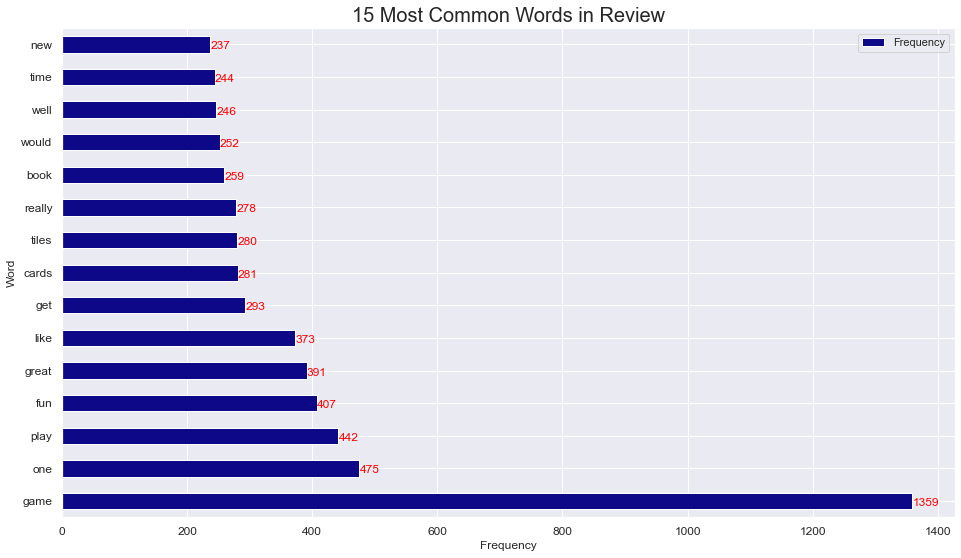

In [88]:
# Set the plot type.
ax = counts_review.plot(kind='barh', figsize=(16, 9), fontsize=12,
                 colormap ='plasma')

# Set the labels.
ax.set_xlabel('Frequency', fontsize=12)
ax.set_ylabel('Word', fontsize=12)
ax.set_title("15 Most Common Words in Review",
             fontsize=20)
plt.xticks(rotation=1800)

# Draw the bar labels.
for i in ax.patches:
    ax.text(i.get_width()+.41, i.get_y()+.1, str(round((i.get_width()), 2)),
            fontsize=12, color='red')

In [89]:
# Determine the 15 most common words in summary column.
fdist1_summary = FreqDist(summary_tokens1)

# Preview the data.
fdist1_summary

FreqDist({'game': 268, 'great': 236, 'fun': 175, 'good': 84, 'love': 70, 'like': 54, 'kids': 48, 'book': 42, 'expansion': 42, 'cute': 40, ...})

In [91]:
# Generate a DataFrame from Counter.
counts_summary = pd.DataFrame(Counter(summary_tokens1).most_common(15),
                      columns=['Word', 'Frequency']).set_index('Word')

# Preview data.
counts_summary

,Frequency
Word,
game,268
great,236
fun,175
good,84
love,70
like,54
kids,48
book,42
expansion,42


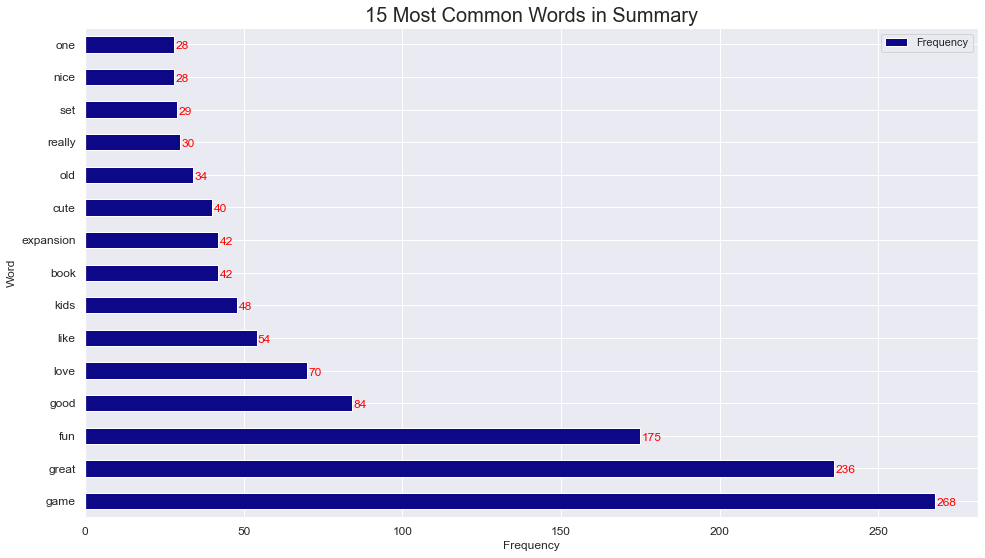

In [92]:
# Set the plot type.
ax = counts_summary.plot(kind='barh', figsize=(16, 9), fontsize=12,
                 colormap ='plasma')

# Set the labels.
ax.set_xlabel('Frequency', fontsize=12)
ax.set_ylabel('Word', fontsize=12)
ax.set_title("15 Most Common Words in Summary",
             fontsize=20)
plt.xticks(rotation=1800)

# Draw the bar labels.
for i in ax.patches:
    ax.text(i.get_width()+.41, i.get_y()+.1, str(round((i.get_width()), 2)),
            fontsize=12, color='red')

## 5. Review polarity and sentiment: Plot histograms of polarity (use 15 bins) and sentiment scores for the respective columns.

In [93]:
# Provided function.
def generate_polarity(comment):
    '''Extract polarity score (-1 to +1) for each comment'''
    return TextBlob(comment).sentiment[0]

In [94]:
# Determine polarity of review column. 
df3['polarity_review'] = df3['review'].apply(generate_polarity)

# View output.
df3['polarity_review'].head()

0   -0.036111
1    0.035952
2    0.116640
3    0.578788
4   -0.316667
Name: polarity_review, dtype: float64

In [95]:
# Determine polarity of summary column. 
df3['polarity_summary'] = df3['summary'].apply(generate_polarity)

# View output.
df3['polarity_summary'].head()

0    0.15
1   -0.80
2    0.00
3    0.00
4    0.00
Name: polarity_summary, dtype: float64

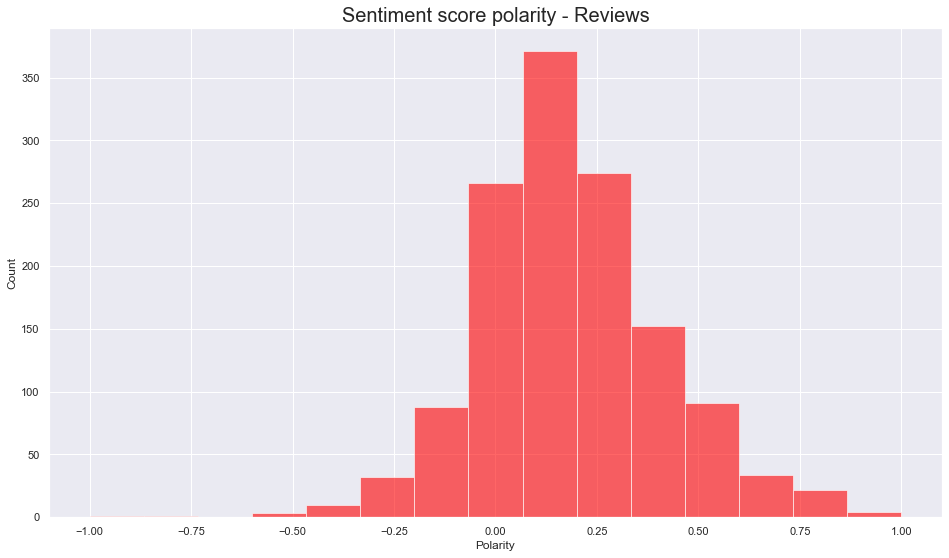

In [96]:
# Review: Create a histogram plot with bins = 15.

# Histogram of polarity

# Set the number of bins.
num_bins = 15

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(df3['polarity_review'], num_bins, facecolor='red', alpha=0.6)

# Set the labels.
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Sentiment score polarity - Reviews', fontsize=20)

plt.show()

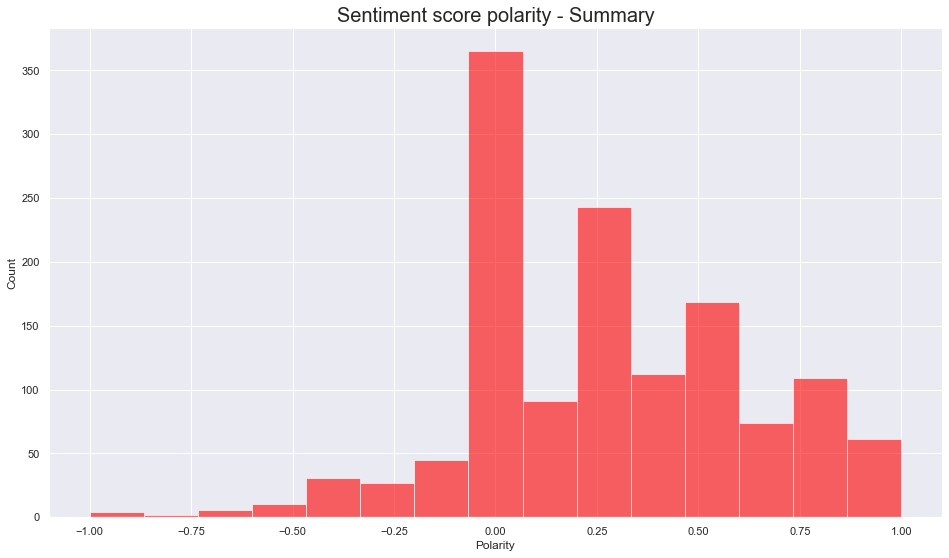

In [97]:
# Summary: Create a histogram plot with bins = 15.

# Histogram of polarity

# Set the number of bins.
num_bins = 15

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(df3['polarity_summary'], num_bins, facecolor='red', alpha=0.6)

# Set the labels.
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Sentiment score polarity - Summary', fontsize=20)

plt.show()

## 6. Identify top 20 positive and negative reviews and summaries respectively

In [98]:
# Top 20 negative reviews.

# Create a DataFrame.
negative_sentiment_review = df3.nsmallest(20, 'polarity_review')
                                  
# Eliminate unnecessary columns.
negative_sentiment_review = negative_sentiment_review[['review', 'polarity_review']]

# View output.
negative_sentiment_review

,review,polarity_review
165,booo unles you are patient know how to measure...,-1.000000
147,incomplete kit very disappointing,-0.780000
267,one of my staff will be using this game soon s...,-0.550000
90,i bought this as a christmas gift for my grand...,-0.500000
141,i sent this product to my granddaughter the po...,-0.491667
251,my 8 yearold granddaughter and i were very fru...,-0.446250
382,i purchased this on the recommendation of two ...,-0.440741
312,this game although it appears to be like uno a...,-0.400000
355,my son loves playing this game it was recommen...,-0.400000
713,if you like me used to play dd but now you and...,-0.400000


In [99]:
# Top 20 negative summaries.

# Create a DataFrame.
negative_sentiment_summary = df3.nsmallest(20, 'polarity_summary')
                                  
# Eliminate unnecessary columns.
negative_sentiment_summary = negative_sentiment_summary[['summary', 'polarity_summary']]

# View output.
negative_sentiment_summary

,summary,polarity_summary
17,the worst value ive ever seen,-1.000000
165,boring unless you are a craft person which i am,-1.000000
587,boring,-1.000000
837,before this i hated running any rpg campaign d...,-0.900000
1,another worthless dungeon masters screen from ...,-0.800000
116,disappointed,-0.750000
266,promotes anger instead of teaching calming met...,-0.700000
634,too bad this is not what i was expecting,-0.700000
637,bad qualityall made of paper,-0.700000
144,at age 31 i found these very difficult to make,-0.650000


In [100]:
# Top 20 positive reviews.

# Create a DataFrame.
positive_sentiment_review = df3.nlargest(20, 'polarity_review')

# Eliminate unnecessary columns.
positive_sentiment_review = positive_sentiment_review[['review', 'polarity_review']]

# View output.
positive_sentiment_review

,review,polarity_review
564,perfect,1.000000
1080,my daughter loves her stickers awesome seller ...,1.000000
1334,perfect for tutoring my grandson in spelling,1.000000
890,the best part i see is the box what a wonderfu...,0.880000
498,great quality very cute and perfect for my tod...,0.816667
31,the pictures are great ive done one and gave ...,0.800000
336,great seller happy with my purchase 5 starrrr,0.800000
439,great easter gift for kids,0.800000
491,these are great,0.800000
692,bought this because i wanted it all these dd g...,0.800000


In [101]:
# Top 20 positive summaries.

# Create a DataFrame.
positive_sentiment_summary = df3.nlargest(20, 'polarity_summary')

# Eliminate unnecessary columns.
positive_sentiment_summary = positive_sentiment_summary[['review', 'polarity_summary']]

# View output.
positive_sentiment_summary

,review,polarity_summary
5,i have bought many gm screens over the years b...,1.0
23,these are intricate designs for older children...,1.0
27,awesome my 8 year olds favorite xmas gift its ...,1.0
61,my daughter loves these little books theyre th...,1.0
107,this occupied my almost3 year old for nearly a...,1.0
112,i bought 8 of these for my 3 year old daughter...,1.0
132,my 8 year old son loves this drawing book love...,1.0
133,this was a christmas present for a nephew who ...,1.0
150,great product took a little practice and time ...,1.0
166,i was skeptical but my 9 year old has had so m...,1.0


## 7. Discuss: Insights and observations

***Your observations here...***

The initial review word cloud analysis showed little indication to the sentiment of those writing messages. The words in the review wordcloud were vague and pointed to no particular direction whether that be positive or negative, although there were words like; love, better and like the words were not common enough to display significance or emphasis.

The initial summary wordcloud displayed more emphasis on key words such as great fun and loved which were larger and therefore more common, this overall showed a positive sentiment.

After removal of stopwords and alphanumerics the positive sentiments in both review and summary were even more defined and emphasised. Words such as great, fun, good and love made up some of the greatest volume of words.

Although there are negative sentiments the overarching positive reviews considerably outweigh the negative and as such the volume of the positive sentiments as extracted by the sentiment analysis is evidently present throughout wordclouds and counts from polarity. The average polarity score was positive.

It would also be interesting to have further detail on the reviews, such as were the positive reviews in tandem with specific marketing campaigns and during what times of the year.

# 